In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [16]:
df=pd.read_csv(r'C:\Users\pnaik27\Anaconda\Algorithm\Linear Regression\DataSet\car data.csv')

In [17]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [18]:
df['Age']=2020-df['Year']

In [19]:
df=df.drop(columns=['Car_Name','Year'])

In [38]:
df['Owner'].unique()

array([0, 1], dtype=int64)

In [39]:
df=pd.get_dummies(df,columns=['Fuel_Type','Seller_Type', 'Transmission', 'Owner'],drop_first=True)
df

,Selling_Price,Present_Price,Kms_Driven,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1
0,3.35,5.59,27000,6,0,1,0,1,0
1,4.75,9.54,43000,7,1,0,0,1,0
2,7.25,9.85,6900,3,0,1,0,1,0
3,2.85,4.15,5200,9,0,1,0,1,0
4,4.60,6.87,42450,6,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,4,1,0,0,1,0
297,4.00,5.90,60000,5,0,1,0,1,0
298,3.35,11.00,87934,11,0,1,0,1,0
299,11.50,12.50,9000,3,1,0,0,1,0


In [41]:
scaler=StandardScaler()
var=['Selling_Price', 'Present_Price', 'Kms_Driven']
df[var]=scaler.fit_transform(df[var])

In [47]:
var1=['Age']
df[var1]=scaler.fit_transform(df[var1])

In [48]:
df

,Selling_Price,Present_Price,Kms_Driven,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1
0,-0.259482,-0.230957,-0.249862,-0.121309,0,1,0,1,0
1,0.016039,0.228676,0.166703,0.228622,1,0,0,1,0
2,0.508042,0.264749,-0.773171,-1.171102,0,1,0,1,0
3,-0.357883,-0.398519,-0.817431,0.928483,0,1,0,1,0
4,-0.013481,-0.082012,0.152384,-0.121309,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
296,0.950844,0.468383,-0.067927,-0.821171,1,0,0,1,0
297,-0.131561,-0.194884,0.609304,-0.471240,0,1,0,1,0
298,-0.259482,0.398566,1.336574,1.628345,0,1,0,1,0
299,1.344446,0.573110,-0.718497,-1.171102,1,0,0,1,0


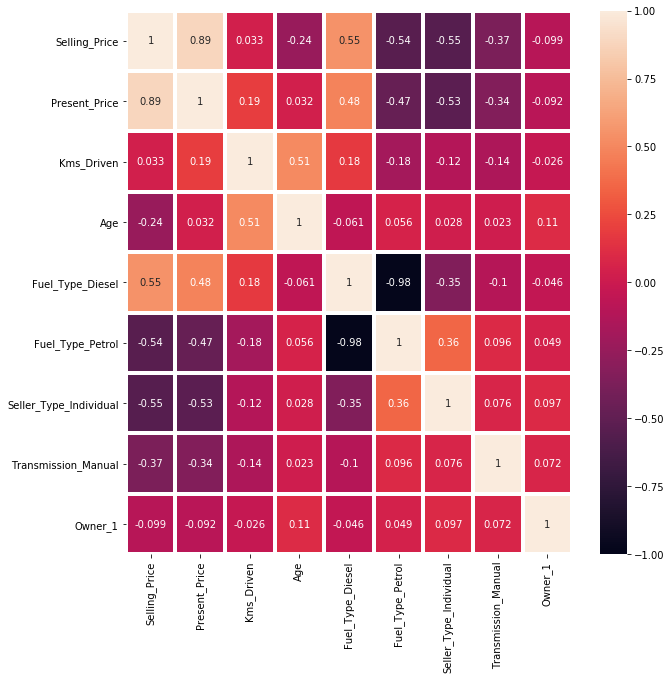

In [51]:
plt.figure(figsize=(10,10))
a=df.corr()
sns.heatmap(a,annot=True,vmin=-1,vmax=1,linewidths=3)

In [53]:
y=df['Selling_Price']
x=df.drop(columns='Selling_Price')

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=355)

In [55]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual', 'Owner_1'],
      dtype='object')

In [57]:
reg=LinearRegression()
reg.fit(x_train,y_train)
print('Training complete')

Training complete


In [58]:
y_pred=reg.predict(x_test)

In [59]:
data=pd.DataFrame({'Actual':y_test,
                   "prediction":y_pred
                  })
data

,Actual,prediction
152,-0.820365,-0.968026
212,1.295246,0.694190
231,0.901644,0.417886
274,0.124280,-0.050845
159,-0.830205,-0.213009
...,...,...
156,-0.824301,-0.606704
243,0.311241,0.188211
92,-0.227994,-0.230972
68,-0.062681,0.245699


In [61]:
from sklearn import metrics
rmsd = np.sqrt(metrics.mean_squared_error(y_test, y_pred))      
r2_value = metrics.r2_score(y_test, y_pred)                     

err=pd.DataFrame({'intecept':[reg.intercept_],
                 'Root Mean Square Error': [rmsd],
                 'R2 Score':[r2_value]})

err

,intecept,Root Mean Square Error,R2 Score
0,0.258407,0.282217,0.837408


In [62]:
from sklearn import metrics
rmsd = np.sqrt(metrics.mean_squared_error(y_test, y_pred))      
r2_value = metrics.r2_score(y_test, y_pred)                     

print("Intercept:", reg.intercept_)
print("Root Mean Square Error :", rmsd)
print("R^2 Value: ", r2_value)

Intercept: 0.2584066416772568
Root Mean Square Error : 0.2822166237280374
R^2 Value:  0.8374083660859202
